In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder,OneHotEncoder,FunctionTransformer,PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,root_mean_squared_error
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LogisticRegression,LinearRegression   
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('concrete_data.csv')

In [3]:
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
982,312.7,0.0,0.0,178.1,8.0,999.7,822.2,28,25.10
805,393.0,0.0,0.0,192.0,0.0,940.0,758.0,90,48.79
909,146.0,173.0,0.0,182.0,3.0,986.0,817.0,28,23.74
192,233.8,0.0,94.6,197.9,4.6,947.0,852.2,56,27.66
468,213.5,0.0,174.2,159.2,11.7,1043.6,771.9,100,52.96


In [4]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
x = df.drop(['Strength'],axis=1)
y=df['Strength']

In [6]:
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=42,test_size=0.2)

In [7]:
x_train.shape,x_test.shape

((824, 8), (206, 8))

In [8]:
y_train.shape,y_test.shape

((824,), (206,))

In [9]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### train linear regression model without transform

In [10]:
x_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [11]:
x_train.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

In [12]:
linear = LinearRegression()

linear.fit(x_train,y_train)

y_pred = linear.predict(x_test)

print("r2 ",
r2_score(y_test,y_pred)
),
print("MSE ",mean_squared_error(y_test,y_pred)
)
print("rmse ",root_mean_squared_error(y_test,y_pred)
)



r2  0.6275531792314848
MSE  95.97094009110684
rmse  9.796475901624362


#### cross validation 

In [13]:
lr = LinearRegression()

np.mean(cross_val_score(lr,x,y,scoring='r2'))

np.float64(0.4609940491662864)

#### plot fo every graph

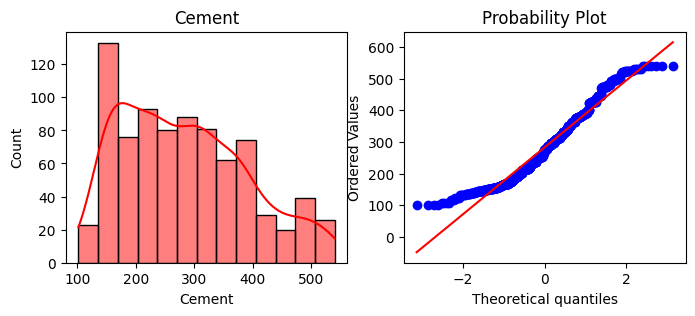

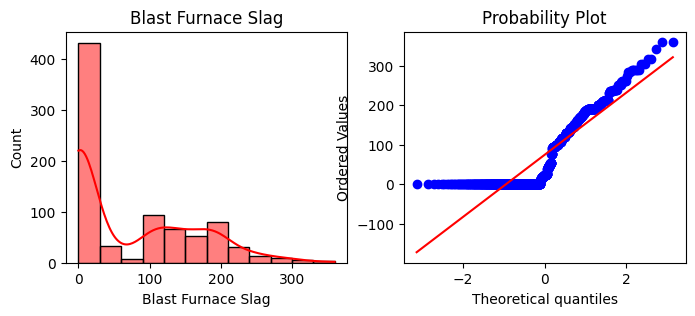

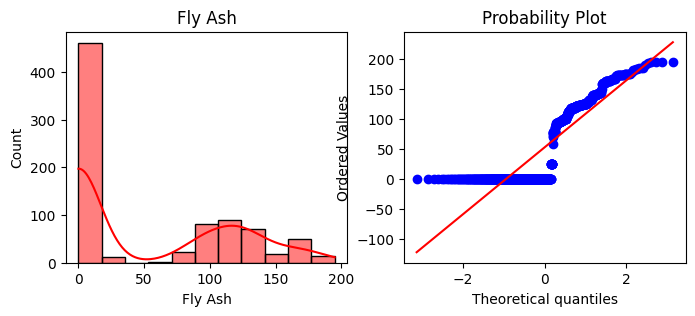

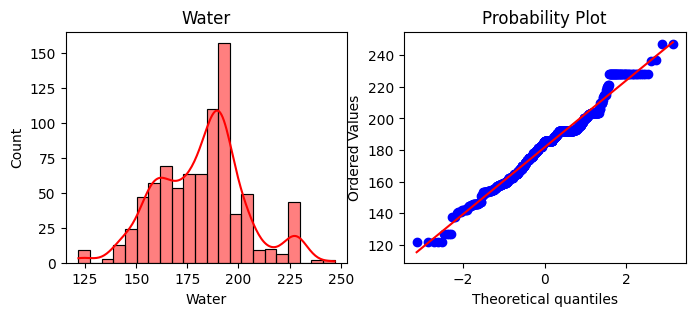

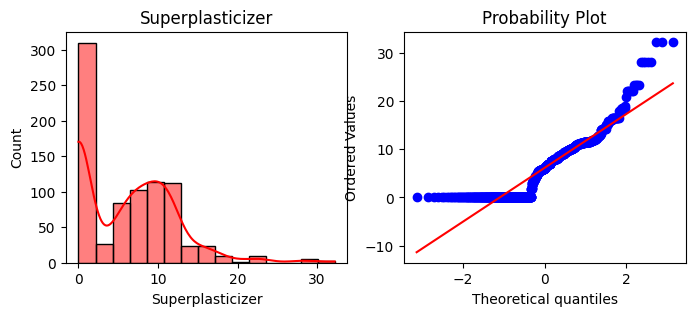

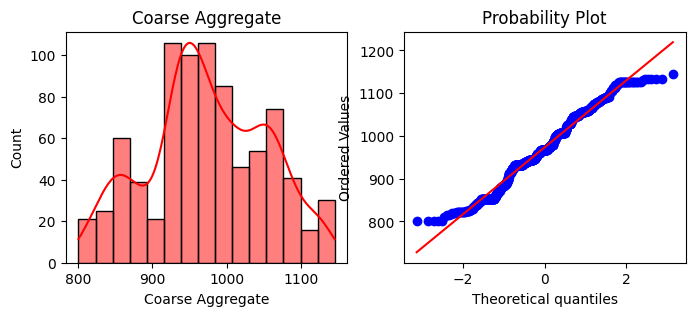

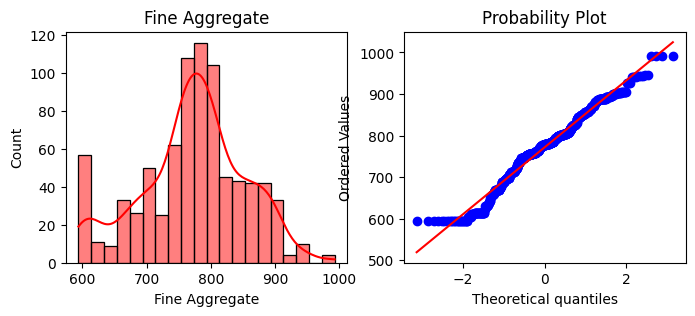

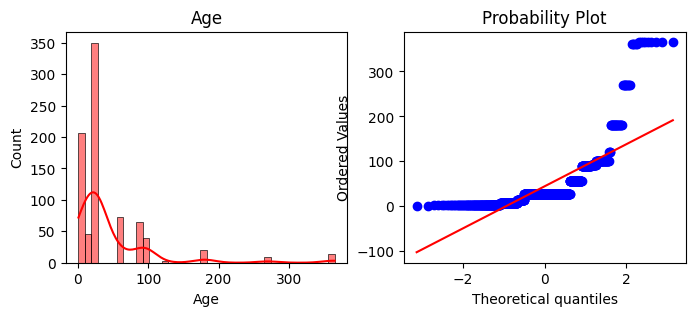

In [14]:
for col in x_train.columns:
    fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(8,3))
    sns.histplot(x_train[col],ax=ax1,color='Red',kde=True)

    ax1.set_title(x_train[col].name)
    stats.probplot(x_train[col],dist='norm',plot=ax2)
    plt.show()
    ax1.set_title(x_train[col].name)   
    
 
    
    

#### functional transformer apply

In [15]:
x_train.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

In [16]:
function = ColumnTransformer([
    
    
    ('log',FunctionTransformer(func=np.log1p),['Age','Blast Furnace Slag','Fly Ash','Superplasticizer'])
])

In [17]:
# lr = LinearRegression()

x_train_trans = function.fit_transform(x_train)
x_test_trans = function.transform(x_test)
lr= LinearRegression()

lr.fit(x_train_trans,y_train)

y_p = lr.predict(x_test_trans)

r2_score(y_test,y_p)


0.5227472296088829

#### cross validation again on transform 

In [18]:
x_cross = function.fit_transform(x)

lr= LinearRegression()
print("lr" ,np.mean(cross_val_score(lr,x_cross,y,scoring='r2',cv=10)))


lr 0.20775558258101273


In [19]:
pt =PowerTransformer()

x_train_power = pt.fit_transform(x_train+0.00001)
x_test_power  = pt.transform(x_test+0.000001)

pt.lambdas_

array([ 0.17434759,  0.01571496, -0.16144691,  0.77130681,  0.25393441,
        1.1300502 ,  1.78309976,  0.01988478])

In [20]:
pd.DataFrame({'col':x_train.columns,'box cox lambda':pt.lambdas_})

,col,box cox lambda
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253934
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [21]:
lr = LinearRegression()


lr.fit(x_train_power,y_train)

y_pred = lr.predict(x_test_power)

r2_score(y_test,y_pred)

0.8161906681076758

In [22]:
#cross validation again

pt = PowerTransformer(method='box-cox')

x_cros = pt.fit_transform(x+0.0001)

lr = LinearRegression()

np.mean(cross_val_score(lr,x_cros,y,scoring='r2',cv=10))



np.float64(0.6482082289300525)

#### plotting perpose we have to conver np array to dataframe

In [23]:
x_train_power

array([[-1.2797506 ,  1.01816851,  1.13099335, ..., -0.26250397,
        -0.67756699,  0.10577762],
       [ 1.2448127 ,  0.22258311,  1.16667075, ..., -1.91271707,
        -0.3140633 ,  0.10577762],
       [ 0.07975145, -1.05692797,  1.14363685, ...,  1.01840694,
         0.02595441, -1.66497588],
       ...,
       [-0.84466055, -1.05692797,  1.15215189, ...,  1.34537013,
         0.29715299,  1.25751153],
       [ 1.56574084,  0.92179623, -0.88493181, ..., -1.53724924,
         0.07620785,  0.10577762],
       [ 0.42653433, -1.05692797,  1.1236727 , ..., -0.62083673,
         0.09510487,  0.10577762]], shape=(824, 8))

In [24]:
x_array= pd.DataFrame(x_train_power,columns=x_train.columns)

In [25]:
x_array.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
39,-1.273832,1.163764,1.220152,0.903282,0.460965,-1.588495,-1.259415,0.105778
245,0.079751,-1.056928,1.143637,-1.047299,0.796163,1.018407,0.025954,1.257512
738,-0.723468,0.969916,-0.884932,0.488735,-1.221863,-0.108870,0.390980,-1.053312
527,1.033842,-1.056928,-0.884932,0.488735,-1.221863,-0.423484,0.127927,-1.053312
188,0.220685,-1.056928,1.078063,-0.634432,0.743567,-0.162226,1.170944,-0.491262


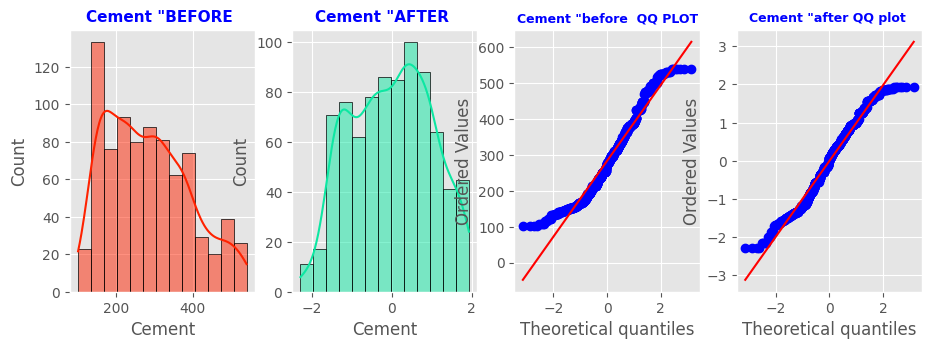

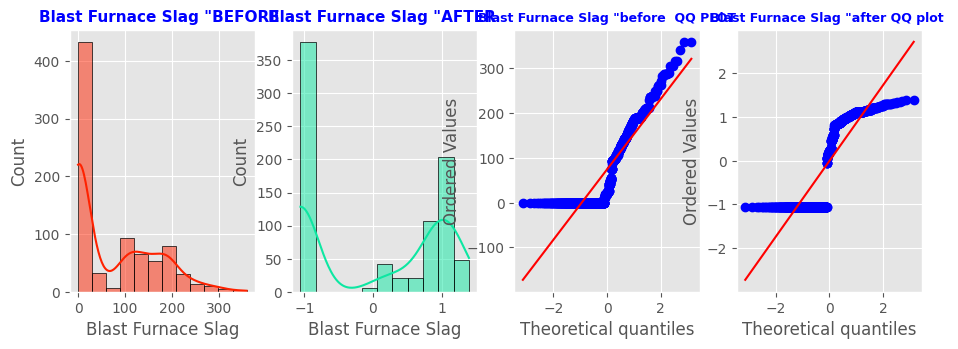

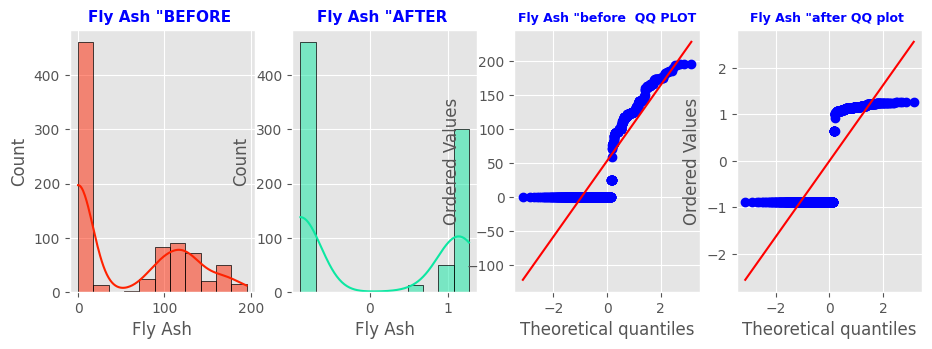

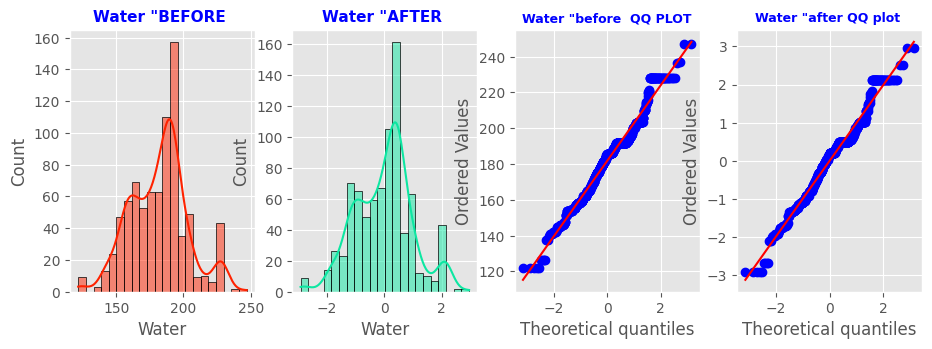

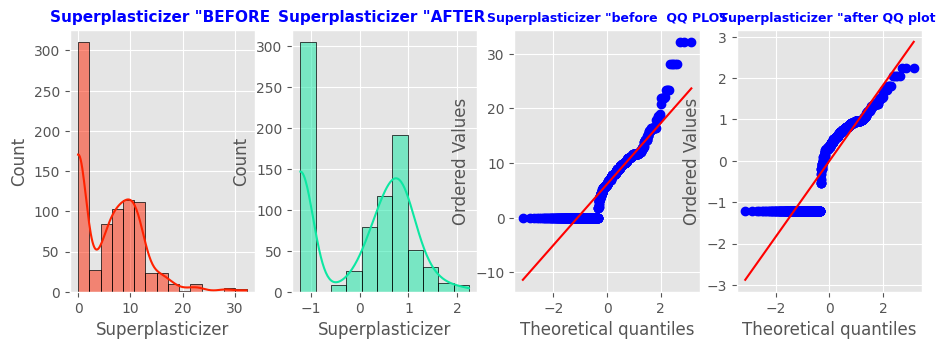

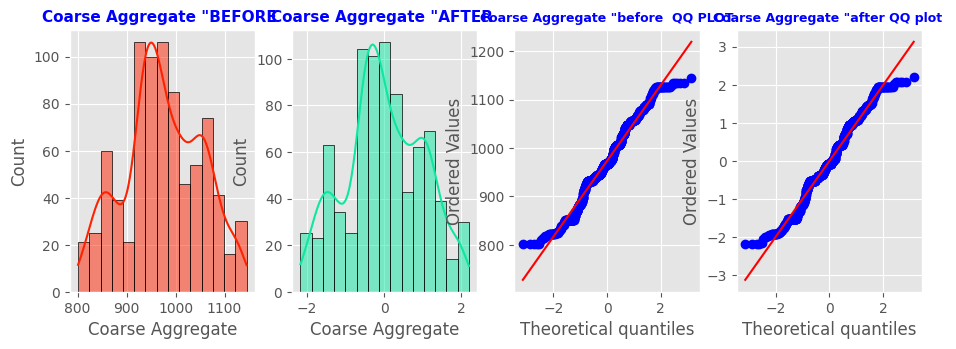

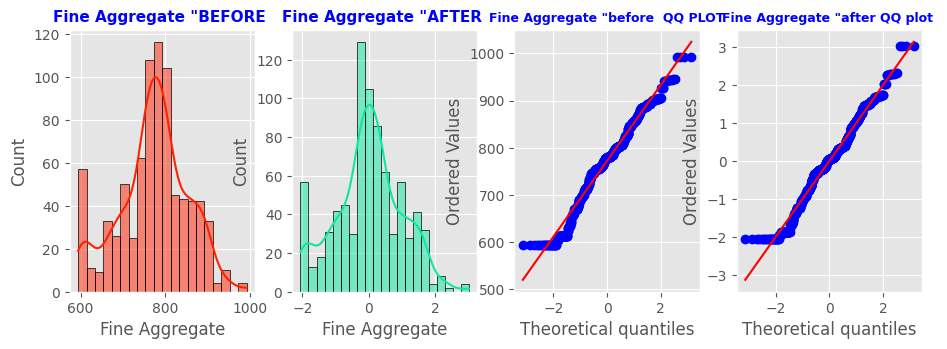

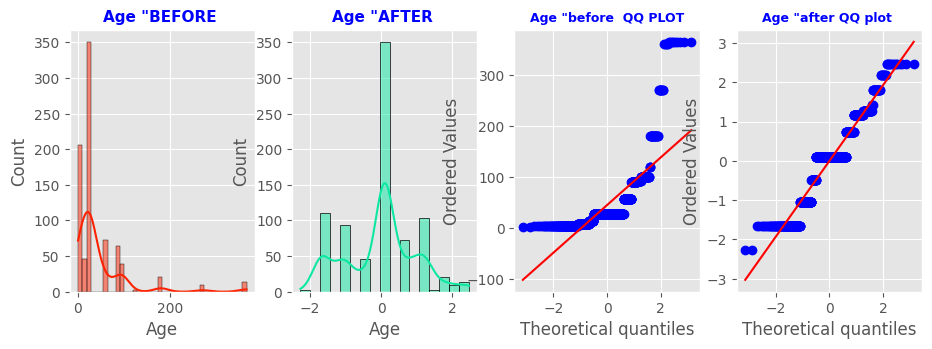

In [26]:
for c in x_array:
    plt.style.use('ggplot')
    fig, (ax1,ax2,ax3,ax4)= plt.subplots(ncols=4,figsize=(11,3.4))
    sns.histplot(x_train[c],kde=True,ax=ax1,color="#ff2200",edgecolor='black')
    ax1.set_title(f'{c} "BEFORE ',fontsize=11, fontweight='bold', color='blue')
    
    sns.histplot(x_array[c],kde=True,ax=ax2,color="#0de7a2",edgecolor='black')
    ax2.set_title(f'{c} "AFTER ',fontsize=11, fontweight='bold', color='blue')
    
    stats.probplot(x_train[c],dist='norm',plot=ax3)
    ax3.set_title(f'{c} "before  QQ PLOT',fontsize=9, fontweight='bold', color='blue')
    stats.probplot(x_array[c],dist='norm',plot=ax4)
    ax4.set_title(f'{c} "after QQ plot ',fontsize=9, fontweight='bold', color='blue')
    plt.show()
    
    
   



#### yeo-johnson

In [27]:
yt = PowerTransformer()

x_train_yeo = yt.fit_transform(x_train)
x_test_yeo = yt.transform(x_test)


lr = LinearRegression()

lr.fit(x_train_yeo,y_train)



Y_pr = lr.predict(x_test_yeo)

r2_score(y_test,Y_pr)


0.8161906511066099

In [28]:
pd.DataFrame({'col':x_train.columns,'yeo paramerter':yt.lambdas_})

,col,yeo paramerter
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [29]:
yt_cross = PowerTransformer()

x_yeo_cross = yt_cross.fit_transform(x)

lr = LinearRegression()


np.mean(cross_val_score(lr,x_yeo_cross,y,scoring='r2'))

np.float64(0.6834625126992433)

#### compare both values

In [30]:
pd.DataFrame({
    'col':x_train.columns,'box-cox ':pt.lambdas_,'yeo-johnson':yt_cross.lambdas_
})

,col,box-cox,yeo-johnson
0,Cement,0.172271,0.169544
1,Blast Furnace Slag,0.031303,0.016633
2,Fly Ash,-0.043311,-0.136480
3,Water,0.809568,0.808438
4,Superplasticizer,0.135340,0.264160
5,Coarse Aggregate,1.129167,1.129395
6,Fine Aggregate,1.829625,1.830764
7,Age,0.048970,0.001771
